Here I screen the ChEMBL based drug-target network with proximity calculations.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import attila_utils

In [2]:
%%bash
cd ../../results/2021-11-09-chembl-screen-v1
cat chembl-knowledge.cfg

[DEFAULT]
dis_genes_fpath = ../../results/2021-07-01-high-conf-ADgenes/AD-genes-knowledge
network_fpath = ../../resources/PPI/Cheng2019/network.sif
id_mapping_file = ../../resources/PPI/geneid_to_symbol.txt
drug_target_network_fpath = ../../results/2021-10-24-chembl-query/chembl-avg_p_activities-phase_3_4-avg_p_act_5plus.csv 
asynchronous = yes
max_workers = 6
test_run = no
out_csv = chembl-knowledge.csv


The screen was ran with the following command:

In [3]:
csv_path = '../../results/2021-11-09-chembl-screen-v1/chembl-knowledge.csv'
chembl = pd.read_csv(csv_path, index_col=0)
chembl = chembl.sort_values('z')
columns = ['rank'] + list(chembl.columns)
chembl['rank'] = np.arange(chembl.shape[0], dtype=np.int64) + 1
chembl = chembl.reindex(columns=columns)
chembl.columns = pd.MultiIndex.from_product([chembl.columns, ['ChEMBL']])
chembl.xs('ChEMBL', axis=1, level=1).head(30)

,rank,drug_name,max_phase,indication_class,uniprot_name,target_name,d,avg_d_H0,sdev_d_H0,z,p
CHEMBL520733,1,SEMAGACESTAT,3,NaN,PSN1|PSN2|APH1B|NICA|APH1A|PEN2,Gamma-secretase|Gamma-secretase|Gamma-secretas...,0.666667,1.757000,0.186952,-5.832161,2.735708e-09
CHEMBL1770916,2,NIROGACESTAT,3,NaN,PSN1|PSN2|APH1B|NICA|APH1A|PEN2,Gamma-secretase|Gamma-secretase|Gamma-secretas...,0.666667,1.766833,0.193348,-5.690097,6.348380e-09
CHEMBL14370,3,REBOXETINE,4,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.954333,0.188630,-5.059291,2.104091e-07
CHEMBL99946,4,LEVOMILNACIPRAN,4,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.965000,0.192058,-5.024535,2.523268e-07
CHEMBL511099,5,BICIFADINE,3,Analgesic,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.965000,0.192058,-5.024535,2.523268e-07
CHEMBL612,6,DEXTROAMPHETAMINE,4,Stimulant (central),SC6A2|SC6A4|SC6A3|TAAR1,Norepinephrine transporter|Serotonin transport...,1.000000,1.951667,0.189729,-5.015917,2.639052e-07
CHEMBL43048,7,MIDOMAFETAMINE,3,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.951667,0.189729,-5.015917,2.639052e-07
CHEMBL201960,8,PYROVALERONE,4,Stimulant (central),SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.953667,0.191972,-4.967740,3.386882e-07
CHEMBL259209,9,MILNACIPRAN,4,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.953667,0.191972,-4.967740,3.386882e-07
CHEMBL1118,10,DESVENLAFAXINE,4,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.953667,0.191972,-4.967740,3.386882e-07


## Comparison to DrugBank based results

In [4]:
# drugbank based results
csv_path = '../../results/2021-09-28-drugbank-screen-v1/knowledge-approved.csv'
drugbank = pd.read_csv(csv_path, index_col='drugbank_id')
drugbank = drugbank.sort_values('z')
drugbank = drugbank.drop('type', axis=1) # type = 'small molecule' for all
columns = ['rank'] + list(drugbank.columns)
drugbank['rank'] = np.arange(drugbank.shape[0], dtype=np.int64) + 1
drugbank = drugbank.reindex(columns=columns)

# switch to ChEMBL ID index
fpath = '../../resources/UniChem/chembl2drugbank.tsv'
drugbank2chembl = pd.read_csv(fpath, sep='\t', index_col=1).rename(columns={"From src:'1'": 'chembl_id'}).rename_axis(index='drugbank_id')
drugbank = pd.concat([drugbank, drugbank2chembl], axis=1, join='inner').set_index('chembl_id')
drugbank.columns = pd.MultiIndex.from_product([drugbank.columns, ['DrugBank']])

In [5]:
sel_cols = ['rank', 'd', 'z', 'p']
results = pd.concat([chembl, drugbank.loc[~ drugbank.index.duplicated(), zip(sel_cols, ['DrugBank'] * len(sel_cols))]], axis=1, join='inner')
columns = ['drug_name', 'max_phase', 'indication_class', 'uniprot_name', 'target_name', 'rank', 'd', 'z', 'p']
results = pd.concat([results.xs(col, 1, 0, drop_level=False) for col in columns], axis=1)

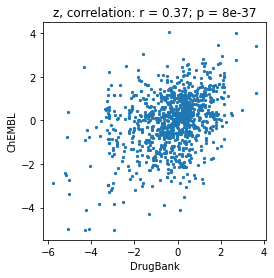

In [6]:
def mycorrplot(col='z'):
    fig, ax = plt.subplots(figsize=(4, 4))
    data = results.xs(col, 1, 0).dropna()
    data.plot(kind='scatter', x='DrugBank', y='ChEMBL', ax=ax, marker='.')
    res = stats.pearsonr(x=data.DrugBank, y=data.ChEMBL)
    ax.set_title(col + ', correlation: ' + 'r = {0:.2f}; p = {1:.0e}'.format(*res))
    return(res)

res = mycorrplot('z')

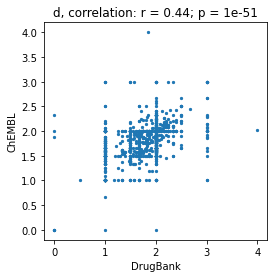

In [7]:
res = mycorrplot('d')

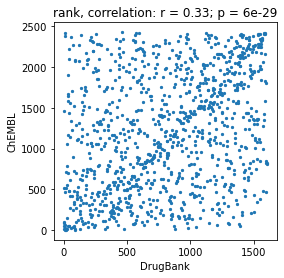

In [8]:
res = mycorrplot('rank')

In [9]:
%connect_info

{
  "shell_port": 60055,
  "iopub_port": 60056,
  "stdin_port": 60057,
  "control_port": 60059,
  "hb_port": 60058,
  "ip": "127.0.0.1",
  "key": "e210c0e8-f55f99c4934817c67855f1bc",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-9e56a6a9-8123-4a83-b56f-35caff8a76bd.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
